In [47]:
# import libraries
library(ggplot2)

# «Les Enfants des Glaces : Créatures d’Europe et de l’Océan Caché»

## Description

### Context

Des astrobiologistes analysent des modèles théoriques de la faune potentielle d’Europe, la lune glacée de Jupiter, inspirés par les écosystèmes extrêmes des pôles terrestres. En s'appuyant sur des études d'organismes vivant dans les environnements glaciaires de l’Arctique et de l’Antarctique, les chercheurs explorent les adaptations possibles de créatures évoluant sous l’épaisse couche de glace d’Europe, où un océan liquide pourrait exister. Les similitudes entre ces hypothèses et les adaptations observées chez des espèces terrestres résistantes au froid extrême et à la faible lumière alimentent les hypothèses sur la possibilité de formes de vie dans des environnements extraterrestres hostiles.

### Pistes possibles à exploiter sur ce jeu de données

- Les organismes hypothétiques de la lune Europe ont-ils des tailles corporelles différentes selon les environnements extrêmes où ils vivent ?

- Comment la profondeur à laquelle ces organismes vivent influence-t-elle leur taux de reproduction ?

- Le type d'environnement (glaces profondes, océan sous-glaciaire, fumeurs noirs) affecte-t-il la coloration ou le type de reproduction des organismes ?

Complexité : faible

## Data Analysis

### Initial Look at the Data

In [44]:
europa <- read.table("datasets/europa.txt", header = TRUE, sep = "\t")

In [94]:
nb_entries = nrow(europa)
nb_cat = ncol(europa)
sprintf("%d entries, %d categories", nb_entries, nb_cat)
names(europa)
str(europa)
summary(europa)

[1] "75 entries, 8 categories"

[1] "ID"                "environment"       "organism_type"    
[4] "body_size_cm"      "depth_m"           "reproduction_rate"
[7] "coloration"        "reproduction_type"

'data.frame':	75 obs. of  8 variables:
 $ ID               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ environment      : chr  "Deep_ice_caves" "Black_smokers" "Subglacial_ocean" "Deep_ice_caves" ...
 $ organism_type    : chr  "Cryo_insect" "Tubeworm" "Thermophilic_crustacean" "Ice_worm" ...
 $ body_size_cm     : num  2.21 29.87 9.13 4.95 10.03 ...
 $ depth_m          : num  110.4 306.2 189.5 79.6 199.7 ...
 $ reproduction_rate: num  4.35 0 3.46 3.19 2.69 2.39 3.66 4.95 1.28 3.27 ...
 $ coloration       : chr  "Transparent" "Red" "Red" "White" ...
 $ reproduction_type: chr  "Sexual" "Asexual" "Asexual" "Sexual" ...


       ID       environment        organism_type       body_size_cm  
 Min.   : 1.0   Length:75          Length:75          Min.   : 0.00  
 1st Qu.:19.5   Class :character   Class :character   1st Qu.: 4.43  
 Median :38.0   Mode  :character   Mode  :character   Median : 9.84  
 Mean   :38.0                                         Mean   :11.10  
 3rd Qu.:56.5                                         3rd Qu.:14.90  
 Max.   :75.0                                         Max.   :31.16  
    depth_m      reproduction_rate  coloration        reproduction_type 
 Min.   : 69.9   Min.   :0.000     Length:75          Length:75         
 1st Qu.:107.2   1st Qu.:1.795     Class :character   Class :character  
 Median :195.0   Median :3.260     Mode  :character   Mode  :character  
 Mean   :188.3   Mean   :2.915                                          
 3rd Qu.:218.2   3rd Qu.:4.360                                          
 Max.   :319.1   Max.   :5.600                                          

### ᕕ( ᐕ )ᕗ 


    Bioluminescent_fish Chemosynthetic_bacteria             Cryo_insect 
                     14                       6                      12 
               Ice_worm Thermophilic_crustacean                Tubeworm 
                     15                      16                      12 

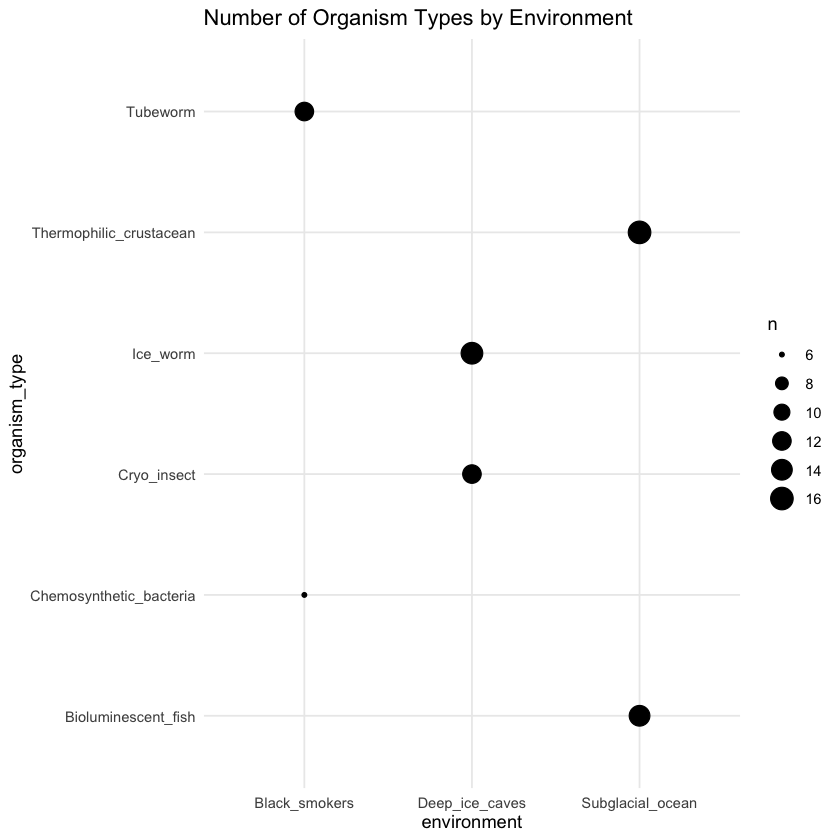

In [120]:
table(europa$organism_type)
ggplot(europa, aes(x=environment, y=organism_type)) +
    geom_count() +
    theme_minimal() +
    ggtitle("Number of Organism Types by Environment")

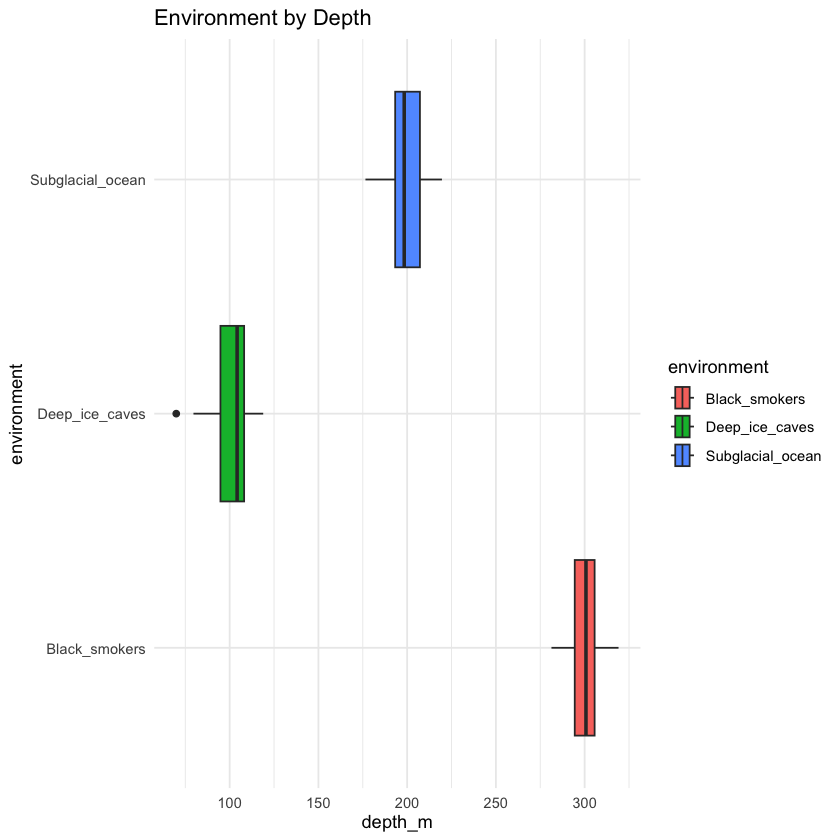

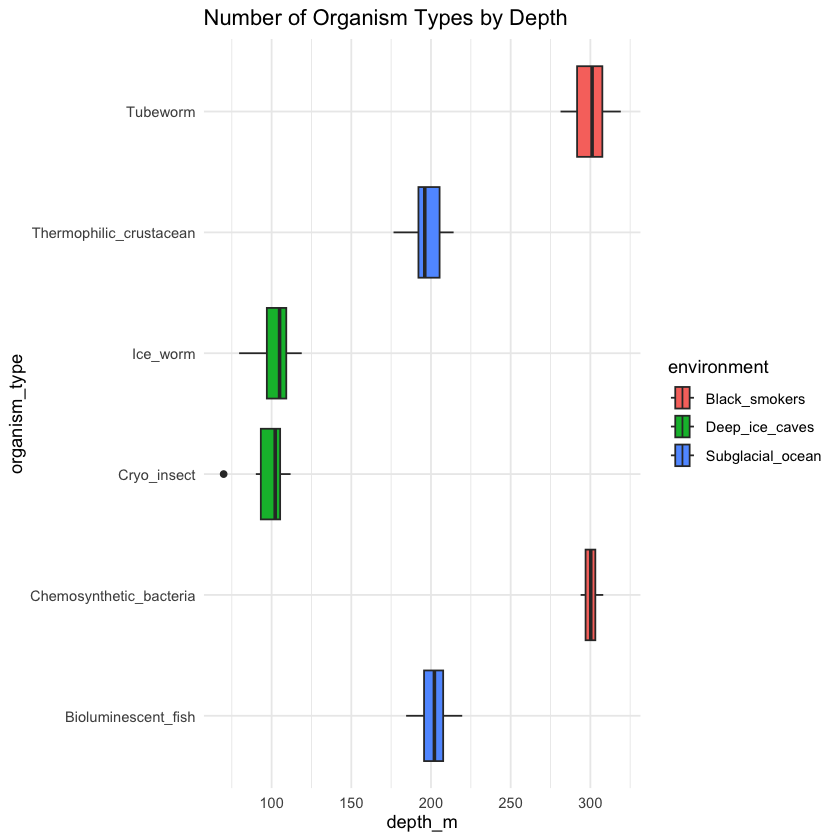

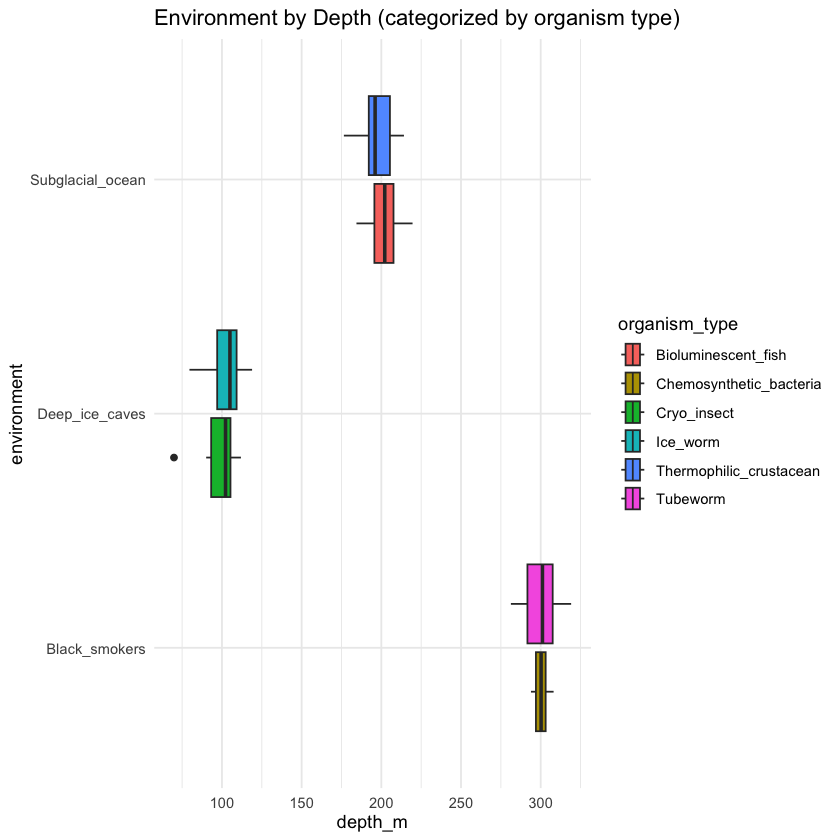

In [148]:
ggplot(europa, aes(x=depth_m, y=environment, fill=environment)) +
    geom_boxplot() +
    theme_minimal() +
    ggtitle("Environment by Depth")
    
ggplot(europa, aes(x=depth_m, y=organism_type, fill=environment)) +
    geom_boxplot() +
    theme_minimal() +
    ggtitle("Number of Organism Types by Depth")

ggplot(europa, aes(x=depth_m, y=environment, fill=organism_type)) +
    geom_boxplot() +
    theme_minimal() +
    ggtitle("Environment by Depth (categorized by organism type)")

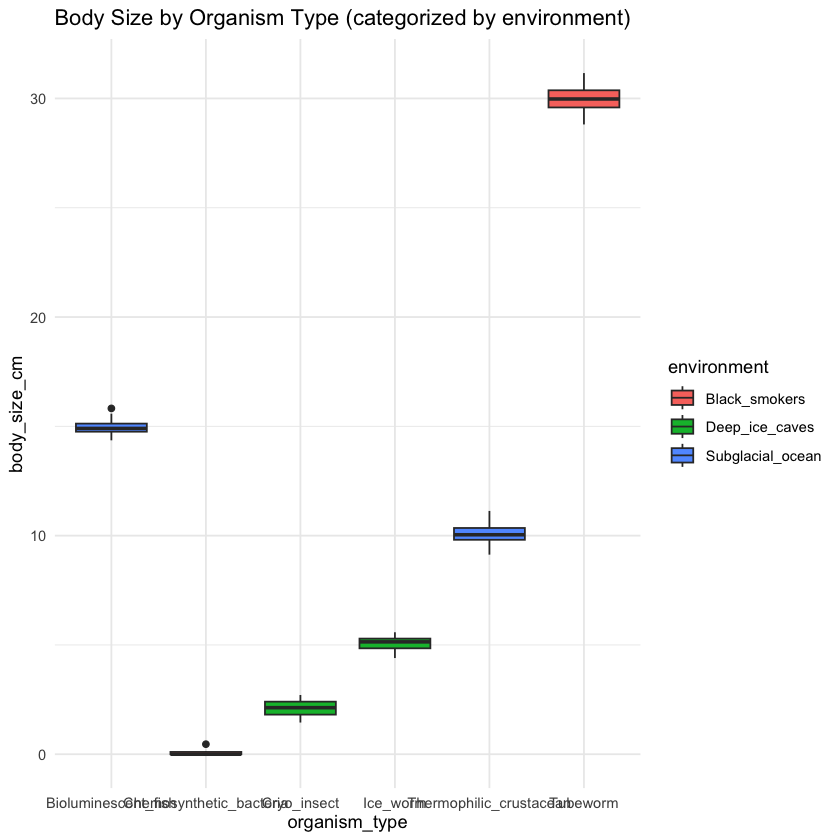

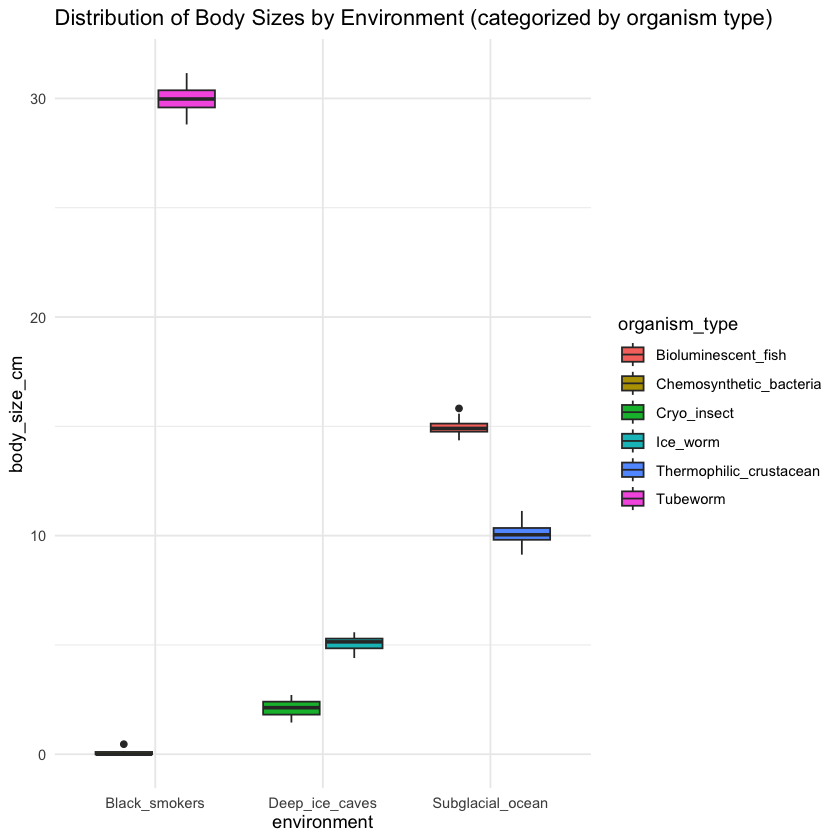

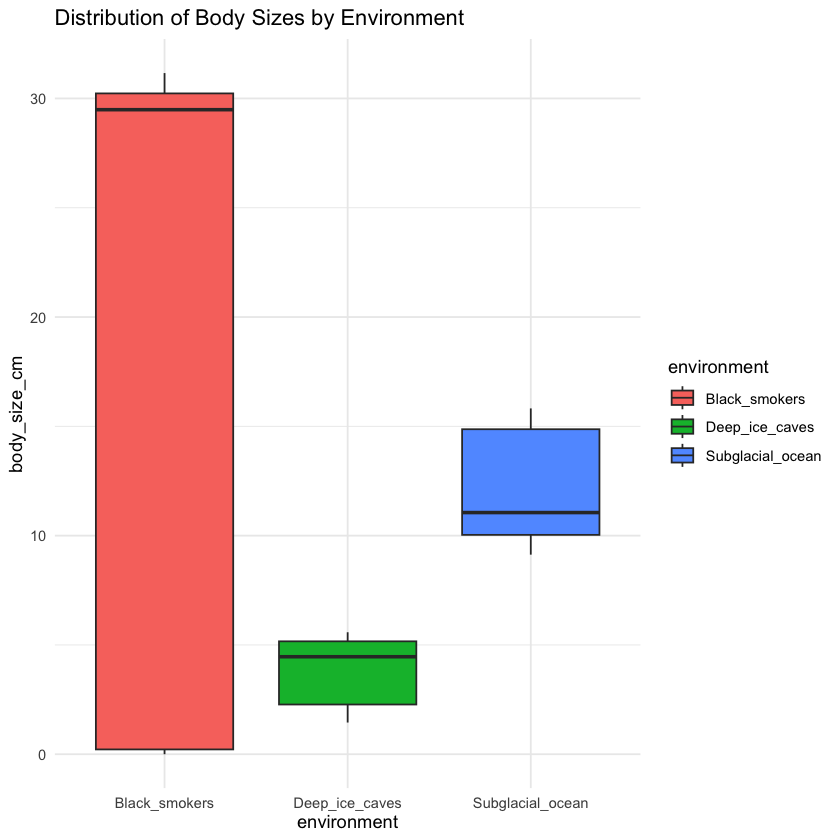

In [149]:
ggplot(europa, aes(x=organism_type, y=body_size_cm, fill=environment)) +
    geom_boxplot() +
    theme_minimal() +
    ggtitle("Body Size by Organism Type (categorized by environment)")

ggplot(europa, aes(x=environment, y=body_size_cm, fill=organism_type)) +
    geom_boxplot() +
    theme_minimal() +
    ggtitle("Distribution of Body Sizes by Environment (categorized by organism type)")

ggplot(europa, aes(x=environment, y=body_size_cm, fill=environment)) +
    geom_boxplot() +
    theme_minimal() +
    ggtitle("Distribution of Body Sizes by Environment")

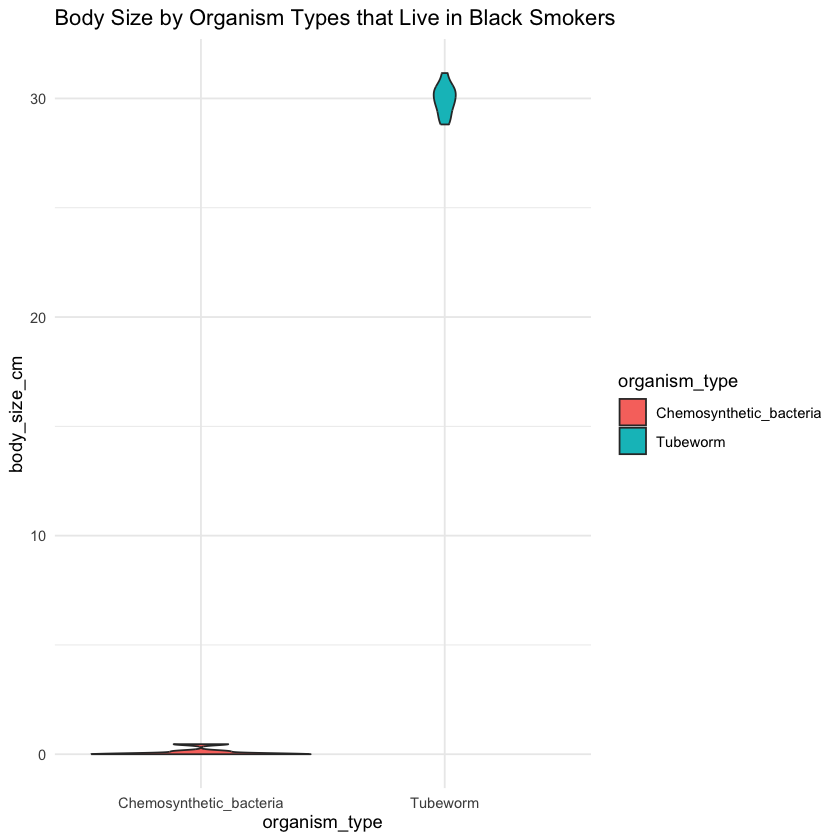

In [151]:
ggplot(europa[europa$environment=="Black_smokers",], aes(x=organism_type, y=body_size_cm, fill=organism_type)) +
    geom_violin() +
    theme_minimal() +
    ggtitle("Body Size by Organism Types that Live in Black Smokers")

### Suggested Questions

#### Les organismes hypothétiques de la lune Europe ont-ils des tailles corporelles différentes selon les environnements extrêmes où ils vivent ?

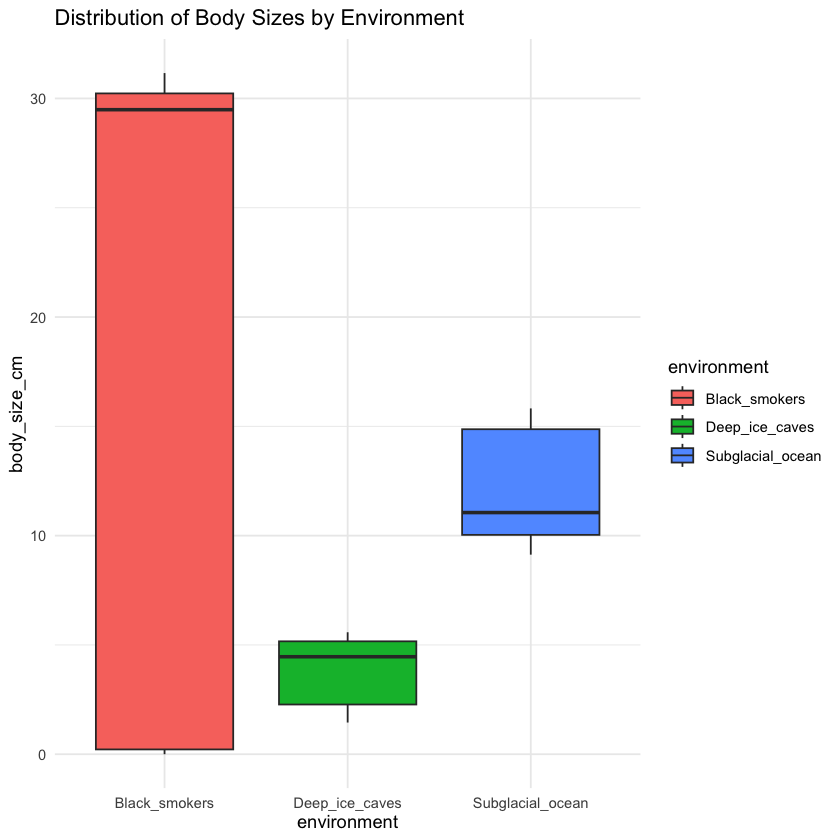

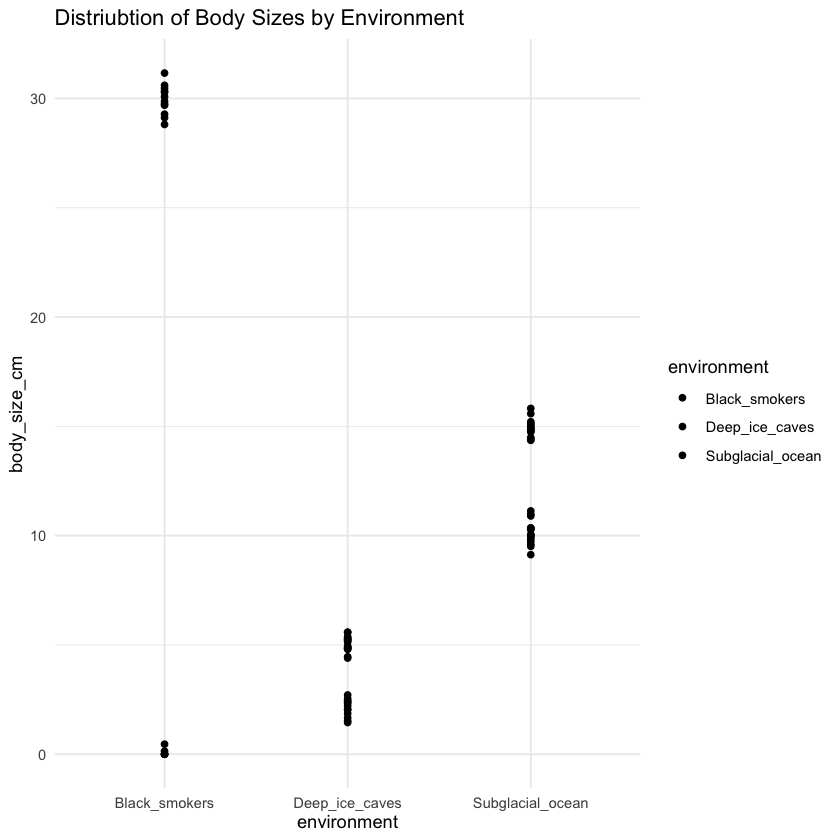

In [68]:
ggplot(europa, aes(x=environment, y=body_size_cm, fill=environment)) +
    geom_boxplot() +
    theme_minimal() +
    ggtitle("Distribution of Body Sizes by Environment")

ggplot(europa, aes(x=environment, y=body_size_cm, fill=environment)) +
    geom_point() +
    theme_minimal() +
    ggtitle("Distriubtion of Body Sizes by Environment")

#### Comment la profondeur à laquelle ces organismes vivent influence-t-elle leur taux de reproduction ?

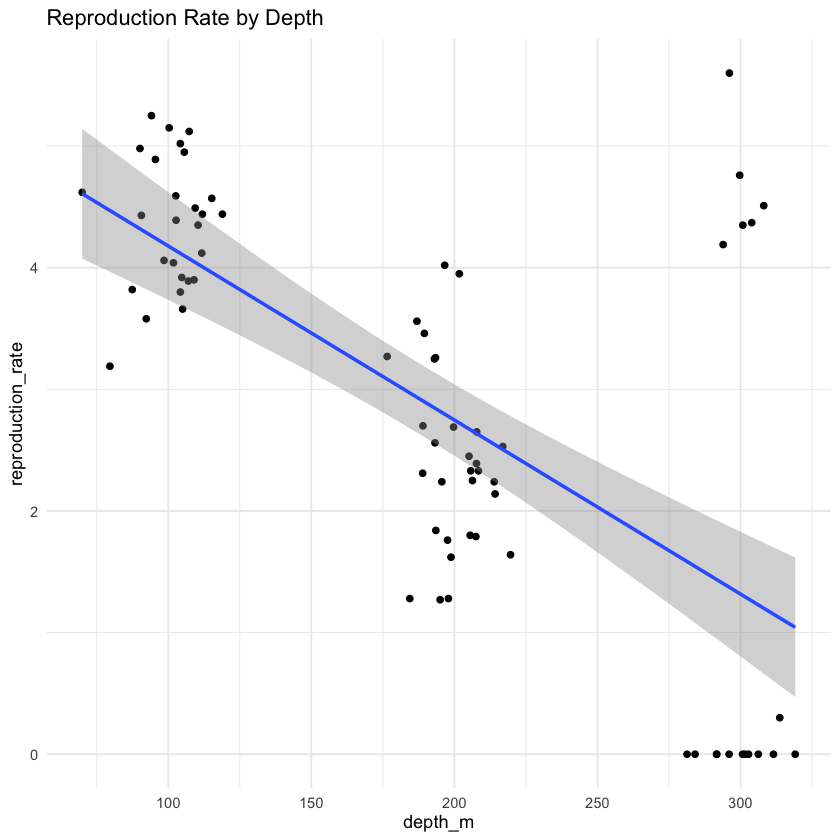

In [74]:
ggplot(europa, aes(x=depth_m, y=reproduction_rate)) +
    geom_point() +
    geom_smooth(method="lm", formula = "y ~ x") +
    theme_minimal() +
    ggtitle("Reproduction Rate by Depth")

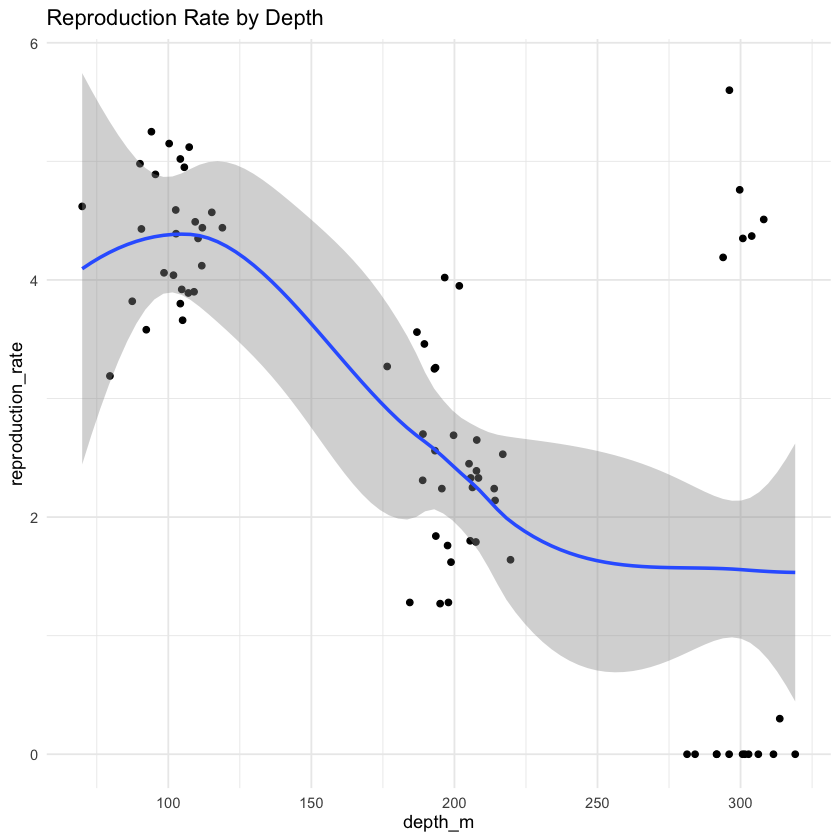

In [73]:
ggplot(europa, aes(x=depth_m, y=reproduction_rate)) +
    geom_point() +
    geom_smooth(method = "loess", formula = "y ~ x") +
    theme_minimal() +
    ggtitle("Reproduction Rate by Depth")

# loess = Locally Estimated Scatterplot Smoothing

#### Le type d'environnement (glaces profondes, océan sous-glaciaire, fumeurs noirs) affecte-t-il la coloration ou le type de reproduction des organismes ?

# «Les Gardiennes Immobiles : Les Tortues Géantes des Galápagos selon Charles Darwin»

## Description

### Context

Des scientifiques explorent un carnet inédit attribué à Charles Darwin, récemment retrouvé dans une archive oubliée, qui documente minutieusement ses observations des tortues géantes des Galápagos lors de son voyage en 1835. Ce carnet offre des données précieuses sur les différences morphologiques entre les espèces de tortues réparties sur plusieurs îles, révélant des variations dans la taille, la forme de la carapace et la longévité, probablement en réponse aux conditions écologiques uniques de chaque île. En comparant ces observations aux données contemporaines, les chercheurs examinent les liens potentiels entre ces attributs, cherchant à établir comment la répartition géographique, les ressources alimentaires et l'altitude influencent les caractéristiques distinctives de chaque espèce de tortue géante.

### Pistes possibles à exploiter sur ce jeu de données :

- Les tortues géantes des différentes îles ont-elles des tailles ou des formes de carapace différentes ?

- Comment l'âge des tortues influence-t-il leur santé, comme la charge parasitaire ou la réponse immunitaire ?

- L'environnement (altitude, nourriture disponible) a-t-il un impact sur les caractéristiques physiques des tortues géantes ?

Complexité : modérée

## Data Analysis

In [45]:
tortoises <- read.table("datasets/tortoises.txt", header = TRUE, sep = "\t")

# «Les Crocs de l'Immunité : Résilience du Système Immunitaire des Requins»

## Description

### Context

Ce jeu de données examine les caractéristiques uniques et la résilience du système immunitaire des requins, des prédateurs marins réputés pour leur résistance exceptionnelle aux infections et aux cancers. Les données incluent des informations sur les types de cellules immunitaires spécifiques aux requins, les gènes associés à la réponse immunitaire, et les mécanismes de régénération et de réparation tissulaire. On y trouve également des analyses de la production d’anticorps, des récepteurs immunitaires, et des réponses à diverses infections ou blessures. L'objectif est de comprendre les bases génétiques et cellulaires de l'efficacité immunitaire des requins, offrant des perspectives pour la recherche en immunologie et la découverte de nouvelles approches thérapeutiques.

### Pistes possibles à exploiter sur ce jeu de données :

- Les requins possèdent-ils des cellules immunitaires spécifiques qui les rendent plus résistants aux infections ?

- Comment les gènes liés à l'immunité chez les requins réagissent-ils en cas de blessure ou d'infection ?

- La capacité de régénération tissulaire des requins est-elle liée à l'efficacité de leur système immunitaire ?

Complexité : avancée

## Data Analysis

In [46]:
shark <- read.table("datasets/shark_immunity.txt", header = TRUE, sep = "\t")